## Example of how to use data

### Primer

1) using git switch your branch to the akanni branch: 
    git pull origin david

2) Open the zip folder I have sent you

    There should be a folder called Checkpoints.

    Save this in your working directory for this project
 


### Data Layout

The Checkpoints folder contains save data for different models trained. 

Each subfolder is a model type e.g. lognormal or compound_poisson that has been trained.

Each subfolder will have a directory structure as follows:

* lognormal
    * version0
        * checkpoints
    * version1
        * checkpoints


## Loading in Saved Predictions

In [1]:
## Example of how to load in the model's predictions for a specific Town
# This cell allows you to specific which model to retreive
model_version = 1
target_distribution = "gamma_hurdle"
base_nn = "HLSTM" #(Keep this fixed)

In [22]:
# Run this to get the prediction data in a variable named city_data
# Getting data
sys.path.append('../')
import glms
import pickle
import torch

path_ = f"../Checkpoints/DGLM_{base_nn}_{target_distribution}/lightning_logs/version_{model_version}/"
ckpt_path = glms.NeuralDGLM.get_ckpt_path(os.path.join(path_,"checkpoints"))

scaler_features, scaler_target = glms.NeuralDGLM.load_scalers(path_)
model = glms.NeuralDGLM.load_from_checkpoint(ckpt_path, save_hparams=False, scaler_features=scaler_features, scaler_target=scaler_target)
model.freeze()
model.eval()

test_output = pickle.load( open(os.path.join(path_,"test_output.pkl"),"rb") )
city_data = test_output['Albury'] 

C:\Users\david\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [23]:
city_data.keys()


dict_keys(['pred_mu', 'pred_disp', 'target_did_rain', 'target_rain_value', 'date', 'pred_p'])

## city data contains the following:
* Pred_mu: Prediction for mean term of distribution
* Pred_disp: Prediction for dispersion term
* Pred_p: Prediction for p term

* True observed rain value
* Dates

### Example of processing Data




In [4]:
# Since our model predicts a week of data at once, we essentiall have predictions as follows:
# pred1 = [day1, day2, day3, day4, day5, day6, day7]
# pred2 = [day2, day3, day4, day5, day6, day7, day8]
# pred3 = [day3, day4, day5, day6, day7, day8, day9]

#Therefore to get the non overlapping sequence [day1, day2, .... day7,day8, da9,....]
#we do the the following

day_idx = 2
pred_mu = city_data['pred_mu'][:,day_idx] #.shape
pred_p = city_data['pred_p'][:,day_idx] 
pred_disp = city_data['pred_disp'][:, day_idx]

target_rain_value = city_data['target_rain_value'][:,day_idx]
dates = [ date_index[day_idx] for date_index in city_data['date'] if len(date_index)>day_idx]

### Getting mean value from distribution parameter predictions pred_mu and pred_p and pred_disp
To retreive the mean prediction from our prediction for the distribution parameters simply do the following

In [5]:
mean = model.target_distribution.get_mean(pred_mu, pred_disp, pred_p)
variance = model.target_distribution.get_variance(pred_mu, pred_disp, pred_p)
p = pred_p

'''import matplotlib.pyplot as plt
plt.plot(mean)
plt.show()
plt.plot(variance)
plt.show()
plt.plot(p)
plt.show()
print([mean,variance,p])'''


'import matplotlib.pyplot as plt\nplt.plot(mean)\nplt.show()\nplt.plot(variance)\nplt.show()\nplt.plot(p)\nplt.show()\nprint([mean,variance,p])'

# Which Model Versions to use during testing now

In [6]:
# Compound Poisson -> version [13]
# Gamma -> version 1
# lognormal -> version 4


### Diagnostocs for Gamma Model

In [31]:
cities=sorted(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
             'NorahHead', 'NorfolkIsland',  'Richmond',
            'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
            'Wollongong', 'Canberra', 'Tuggeranong',  'Ballarat',
            'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
            'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
            'Woomera', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
            'Perth',  'Walpole', 'Hobart', 
            'AliceSprings', 'Darwin', 'Uluru'])
 #had to remove 'Albany' , 'Katherine','Launceston','MountGinini','Newcastle','Penrith','SalmonGums',
sys.path.append('../')
import glms
import pickle
import torch

path_ = f"../Checkpoints/DGLM_{base_nn}_{target_distribution}/lightning_logs/version_{model_version}/"
ckpt_path = glms.NeuralDGLM.get_ckpt_path(os.path.join(path_,"checkpoints"))

scaler_features, scaler_target = glms.NeuralDGLM.load_scalers(path_)
model = glms.NeuralDGLM.load_from_checkpoint(ckpt_path, save_hparams=False, scaler_features=scaler_features, scaler_target=scaler_target)
model.freeze()
model.eval()

test_output = pickle.load( open(os.path.join(path_,"test_output.pkl"),"rb") )

C:\Users\david\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [135]:
gamma_allcities=[]

for i,location in enumerate(cities):
    city_data = test_output[location] 
    print(i,location)
    city_data.keys()
    day_idx = 2
    pred_mu = city_data['pred_mu'][:,day_idx] #.shape
    pred_p = city_data['pred_p'][:,day_idx] 
    pred_disp = city_data['pred_disp'][:, day_idx]
    target_rain_value = city_data['target_rain_value'][:,day_idx]
    dates = [ date_index[day_idx] for date_index in city_data['date'] if len(date_index)>day_idx]
    gamma_allcities.append([i,location,pred_mu,pred_disp,pred_p,target_rain_value,dates])
    

0 Adelaide
1 Albury
2 AliceSprings
3 BadgerysCreek
4 Ballarat
5 Brisbane
6 Cairns
7 Canberra
8 Cobar
9 CoffsHarbour
10 Dartmoor
11 Darwin
12 GoldCoast
13 Hobart
14 Moree
15 MountGambier
16 Nhil
17 NorahHead
18 NorfolkIsland
19 Nuriootpa
20 PearceRAAF
21 Perth
22 PerthAirport
23 Portland
24 Richmond
25 Sydney
26 SydneyAirport
27 Townsville
28 Tuggeranong
29 Uluru
30 WaggaWagga
31 Walpole
32 Watsonia
33 Williamtown
34 Witchcliffe
35 Wollongong
36 Woomera


In [ ]:
######################################3



# so to get the correct days/dates:
# the gnn data stop at a certain value, from which onwards the dates are ~nans/not there
# so to get dates for a single location, just cut off the parameter values after the last dates index for that location.

#this will give a list of dates-parameters for each location
#with these dates lists i can use the same methodology as in test.ipynb to get only the overlapping ones

#after having gotten overlapping dates, i basically have a dataset of rain-params/F() for each of the good days
#-->can just use F(rainvalue) to get to us and fit copula

In [212]:
### Gamma ROC

from sklearn.metrics import roc_curve, auc
from scipy.special import gamma
from math import exp
import numpy as np
import scipy.stats as scs

# Gamma: alpha = 1/disp, beta = alpha/mu

g_0mm=[]
g_0mm_cdfx=[]

for place in gamma_allcities:
    for day in range(len(place[5])):
        #vector of 'did it rain this much'
        if place[5][day]>0.1:
            g_0mm.append(1)
        else:
            g_0mm.append(0)
        #vetor of 'probability it rained this much'
        g_0mm_cdfx.append(1-((1-place[4][day])+(place[4][day]*scs.gamma(loc=1/place[3][day],scale=place[3][day]*place[2][day],a=1/place[3][day]).cdf(0.1))))
print('0 done')

g_5mm=[]
g_5mm_cdfx=[]

for place in gamma_allcities:
    for day in range(len(place[5])):
        #vector of 'did it rain this much'
        if place[5][day]>5:
            g_5mm.append(1)
        else:
            g_5mm.append(0)
        #vetor of 'probability it rained this much'
        g_5mm_cdfx.append( 1-((1-place[4][day])+(place[4][day]*scs.gamma(loc=1/place[3][day],scale=place[3][day]*place[2][day],a=1/place[3][day]).cdf(5))))
print('5 done')


g_10mm=[]
g_10mm_cdfx=[]

for place in gamma_allcities:
    for day in range(len(place[5])):
        #vector of 'did it rain this much'
        if place[5][day]>10:
            g_10mm.append(1)
        else:
            g_10mm.append(0)
        #vetor of 'probability it rained this much'
        g_10mm_cdfx.append(1-((1-place[4][day])+(place[4][day]*scs.gamma(loc=1/place[3][day],scale=place[3][day]*place[2][day],a=1/place[3][day]).cdf(10))))
print('10 done')


g_15mm=[]
g_15mm_cdfx=[]

for place in gamma_allcities:
    for day in range(len(place[5])):
        #vector of 'did it rain this much'
        if place[5][day]>15:
            g_15mm.append(1)
        else:
            g_15mm.append(0)
        #vetor of 'probability it rained this much'
        g_15mm_cdfx.append(1-((1-place[4][day])+(place[4][day]*scs.gamma(loc=1/place[3][day],scale=place[3][day]*place[2][day],a=1/place[3][day]).cdf(15))))
print('15 done')


g_20mm=[]
g_20mm_cdfx=[]

for place in gamma_allcities:
    for day in range(len(place[5])):
        #vector of 'did it rain this much'
        if place[5][day]>20:
            g_20mm.append(1)
        else:
            g_20mm.append(0)
        #vetor of 'probability it rained this much'
        g_20mm_cdfx.append(1-((1-place[4][day])+(place[4][day]*scs.gamma(loc=1/place[3][day],scale=place[3][day]*place[2][day],a=1/place[3][day]).cdf(20))))
print('20 done')


g_25mm=[]
g_25mm_cdfx=[]

for place in gamma_allcities:
    for day in range(len(place[5])):
        #vector of 'did it rain this much'
        if place[5][day]>25:
            g_25mm.append(1)
        else:
            g_25mm.append(0)
        #vetor of 'probability it rained this much'
        g_25mm_cdfx.append(1-((1-place[4][day])+(place[4][day]*scs.gamma(loc=1/place[3][day],scale=place[3][day]*place[2][day],a=1/place[3][day]).cdf(25))))
print('25 done')



0 done
5 done
10 done
15 done
20 done
25 done


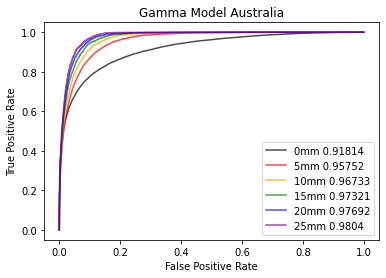

In [226]:
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

### GAMMA

fpr_0mm, tpr_0mm, _ = metrics.roc_curve(g_0mm,g_0mm_cdfx)
auc0 = metrics.roc_auc_score(g_0mm,g_0mm_cdfx)
plt.plot(fpr_0mm,tpr_0mm,label='AUC='+str(auc0),color='black',alpha=0.7)

fpr_5mm, tpr_5mm, _ = metrics.roc_curve(g_5mm,g_5mm_cdfx)
auc5 = metrics.roc_auc_score(g_5mm,g_5mm_cdfx)
plt.plot(fpr_5mm,tpr_5mm,label='AUC='+str(auc5),color='red',alpha=0.7)

fpr_10mm, tpr_10mm, _ = metrics.roc_curve(g_10mm,g_10mm_cdfx)
auc10 = metrics.roc_auc_score(g_10mm,g_10mm_cdfx)
plt.plot(fpr_10mm,tpr_10mm,label='AUC='+str(auc10),color='orange',alpha=0.7)

fpr_15mm, tpr_15mm, _ = metrics.roc_curve(g_15mm,g_15mm_cdfx)
auc15 = metrics.roc_auc_score(g_15mm,g_15mm_cdfx)
plt.plot(fpr_15mm,tpr_15mm,label='AUC='+str(auc15),color='green',alpha=0.7)

fpr_20mm, tpr_20mm, _ = metrics.roc_curve(g_20mm,g_20mm_cdfx)
auc20 = metrics.roc_auc_score(g_20mm,g_20mm_cdfx)
plt.plot(fpr_20mm,tpr_20mm,label='AUC='+str(auc20),color='blue',alpha=0.7)

fpr_25mm, tpr_25mm, _ = metrics.roc_curve(g_25mm,g_25mm_cdfx)
auc25 = metrics.roc_auc_score(g_25mm,g_25mm_cdfx)
plt.plot(fpr_25mm,tpr_25mm,label='AUC='+str(auc25),color='purple',alpha=0.7)

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(['0mm '+str(round(auc0,5)),'5mm '+str(round(auc5,5)),'10mm '+str(round(auc10,5)),'15mm '+str(round(auc15,5)),'20mm '+str(round(auc20,5)),'25mm '+str(round(auc25,5))])
plt.title('Gamma Model Australia')
plt.savefig('ROC Gamma model')

In [ ]:
#other diagnostocs coming soon

### Diagnostics for Lognormal Model

In [15]:
model_version = 4
target_distribution = "lognormal_hurdle"
base_nn = "HLSTM" #(Keep this fixed)

In [16]:
cities=sorted(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
             'NorahHead', 'NorfolkIsland',  'Richmond',
            'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
            'Wollongong', 'Canberra', 'Tuggeranong',  'Ballarat',
            'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
            'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
            'Woomera', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
            'Perth',  'Walpole', 'Hobart', 
            'AliceSprings', 'Darwin', 'Uluru'])
 #had to remove 'Albany' , 'Katherine','Launceston','MountGinini','Newcastle','Penrith','SalmonGums',
sys.path.append('../')
import glms
import pickle
import torch

path_ = f"../Checkpoints/DGLM_{base_nn}_{target_distribution}/lightning_logs/version_{model_version}/"
ckpt_path = glms.NeuralDGLM.get_ckpt_path(os.path.join(path_,"checkpoints"))

scaler_features, scaler_target = glms.NeuralDGLM.load_scalers(path_)
model = glms.NeuralDGLM.load_from_checkpoint(ckpt_path, save_hparams=False, scaler_features=scaler_features, scaler_target=scaler_target)
model.freeze()
model.eval()

test_output = pickle.load( open(os.path.join(path_,"test_output.pkl"),"rb") )

C:\Users\david\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [17]:
lognormal_allcities=[]

for i,location in enumerate(cities):
    city_data = test_output[location] 
    print(i,location)
    city_data.keys()
    day_idx = 2
    pred_mu = city_data['pred_mu'][:,day_idx] #.shape
    pred_p = city_data['pred_p'][:,day_idx] 
    pred_disp = city_data['pred_disp'][:, day_idx]
    target_rain_value = city_data['target_rain_value'][:,day_idx]
    dates = [ date_index[day_idx] for date_index in city_data['date'] if len(date_index)>day_idx]
    lognormal_allcities.append([i,location,pred_mu,pred_disp,pred_p,target_rain_value])

0 Adelaide
1 Albury
2 AliceSprings
3 BadgerysCreek
4 Ballarat
5 Brisbane
6 Cairns
7 Canberra
8 Cobar
9 CoffsHarbour
10 Dartmoor
11 Darwin
12 GoldCoast
13 Hobart
14 Moree
15 MountGambier
16 Nhil
17 NorahHead
18 NorfolkIsland
19 Nuriootpa
20 PearceRAAF
21 Perth
22 PerthAirport
23 Portland
24 Richmond
25 Sydney
26 SydneyAirport
27 Townsville
28 Tuggeranong
29 Uluru
30 WaggaWagga
31 Walpole
32 Watsonia
33 Williamtown
34 Witchcliffe
35 Wollongong
36 Woomera


In [33]:
### Log-Normal ROC

from sklearn.metrics import roc_curve, auc
from math import exp
import numpy as np
import scipy.stats as scs

# Lognormal: mu=mu, disp=sigma

log_0mm=[]
log_0mm_cdfx=[]

for place in lognormal_allcities:
    for day in range(len(place[5])):
        #vector of 'did it rain this much'
        if place[5][day]>0.1:
            log_0mm.append(1)
        else:
            log_0mm.append(0)
        #vetor of 'probability it rained this much'
        log_0mm_cdfx.append(1-((1-place[4][day])+(place[4][day]*scs.lognorm(s=place[3][day],loc=place[2][day]).cdf(0.1))))
print('0 done')

log_1mm_cdfx=[]

for place in lognormal_allcities:
    for day in range(len(place[5])):
        #vetor of 'probability it rained this much'
        log_1mm_cdfx.append( 1-((1-place[4][day])+(place[4][day]*scs.lognorm(s=place[3][day],loc=place[2][day]).cdf(1))))
print('1 done')

log_2mm_cdfx=[]

for place in lognormal_allcities:
    for day in range(len(place[5])):
        #vetor of 'probability it rained this much'
        log_2mm_cdfx.append( 1-((1-place[4][day])+(place[4][day]*scs.lognorm(s=place[3][day],loc=place[2][day]).cdf(2))))
print('2 done')

log_3mm_cdfx=[]

for place in lognormal_allcities:
    for day in range(len(place[5])):
        #vetor of 'probability it rained this much'
        log_3mm_cdfx.append( 1-((1-place[4][day])+(place[4][day]*scs.lognorm(s=place[3][day],loc=place[2][day]).cdf(3))))
print('3 done')


log_4mm_cdfx=[]

for place in lognormal_allcities:
    for day in range(len(place[5])):
        #vetor of 'probability it rained this much'
        log_4mm_cdfx.append( 1-((1-place[4][day])+(place[4][day]*scs.lognorm(s=place[3][day],loc=place[2][day]).cdf(4))))
print('4 done')

log_5mm=[]
log_5mm_cdfx=[]

for place in lognormal_allcities:
    for day in range(len(place[5])):
        #vector of 'did it rain this much'
        if place[5][day]>5:
            log_5mm.append(1)
        else:
            log_5mm.append(0)
        #vetor of 'probability it rained this much'
        log_5mm_cdfx.append( 1-((1-place[4][day])+(place[4][day]*scs.lognorm(s=place[3][day],loc=place[2][day]).cdf(5))))
print('5 done')

log_6mm_cdfx=[]

for place in lognormal_allcities:
    for day in range(len(place[5])):
        #vetor of 'probability it rained this much'
        log_6mm_cdfx.append( 1-((1-place[4][day])+(place[4][day]*scs.lognorm(s=place[3][day],loc=place[2][day]).cdf(6))))
print('6 done')

log_7mm_cdfx=[]

for place in lognormal_allcities:
    for day in range(len(place[5])):
        #vetor of 'probability it rained this much'
        log_7mm_cdfx.append( 1-((1-place[4][day])+(place[4][day]*scs.lognorm(s=place[3][day],loc=place[2][day]).cdf(7))))
print('7 done')

log_8mm_cdfx=[]

for place in lognormal_allcities:
    for day in range(len(place[5])):
        #vetor of 'probability it rained this much'
        log_8mm_cdfx.append( 1-((1-place[4][day])+(place[4][day]*scs.lognorm(s=place[3][day],loc=place[2][day]).cdf(8))))
print('8 done')

log_10mm=[]
log_10mm_cdfx=[]

for place in lognormal_allcities:
    for day in range(len(place[5])):
        #vector of 'did it rain this much'
        if place[5][day]>10:
            log_10mm.append(1)
        else:
            log_10mm.append(0)
        #vetor of 'probability it rained this much'
        log_10mm_cdfx.append(1-((1-place[4][day])+(place[4][day]*scs.lognorm(s=place[3][day],loc=place[2][day]).cdf(10))))
print('10 done')


log_15mm=[]
log_15mm_cdfx=[]

for place in lognormal_allcities:
    for day in range(len(place[5])):
        #vector of 'did it rain this much'
        if place[5][day]>15:
            log_15mm.append(1)
        else:
            log_15mm.append(0)
        #vetor of 'probability it rained this much'
        log_15mm_cdfx.append(1-((1-place[4][day])+(place[4][day]*scs.lognorm(s=place[3][day],loc=place[2][day]).cdf(15))))
print('15 done')


log_20mm=[]
log_20mm_cdfx=[]

for place in lognormal_allcities:
    for day in range(len(place[5])):
        #vector of 'did it rain this much'
        if place[5][day]>20:
            log_20mm.append(1)
        else:
            log_20mm.append(0)
        #vetor of 'probability it rained this much'
        log_20mm_cdfx.append(1-((1-place[4][day])+(place[4][day]*scs.lognorm(s=place[3][day],loc=place[2][day]).cdf(20))))
print('20 done')


log_25mm=[]
log_25mm_cdfx=[]

for place in lognormal_allcities:
    for day in range(len(place[5])):
        #vector of 'did it rain this much'
        if place[5][day]>25:
            log_25mm.append(1)
        else:
            log_25mm.append(0)
        #vetor of 'probability it rained this much'
        log_25mm_cdfx.append(1-((1-place[4][day])+(place[4][day]*scs.lognorm(s=place[3][day],loc=place[2][day]).cdf(25))))
print('25 done')

0 done
1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
10 done
15 done
20 done
25 done


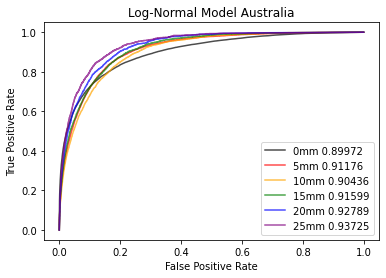

In [259]:
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

### GAMMA

fpr_0mm, tpr_0mm, _ = metrics.roc_curve(log_0mm,log_0mm_cdfx)
auc0 = metrics.roc_auc_score(log_0mm,log_0mm_cdfx)
plt.plot(fpr_0mm,tpr_0mm,label='AUC='+str(auc0),color='black',alpha=0.7)

fpr_5mm, tpr_5mm, _ = metrics.roc_curve(log_5mm,log_5mm_cdfx)
auc5 = metrics.roc_auc_score(log_5mm,log_5mm_cdfx)
plt.plot(fpr_5mm,tpr_5mm,label='AUC='+str(auc5),color='red',alpha=0.7)

fpr_10mm, tpr_10mm, _ = metrics.roc_curve(log_10mm,log_10mm_cdfx)
auc10 = metrics.roc_auc_score(log_10mm,log_10mm_cdfx)
plt.plot(fpr_10mm,tpr_10mm,label='AUC='+str(auc10),color='orange',alpha=0.7)

fpr_15mm, tpr_15mm, _ = metrics.roc_curve(log_15mm,log_15mm_cdfx)
auc15 = metrics.roc_auc_score(log_15mm,log_15mm_cdfx)
plt.plot(fpr_15mm,tpr_15mm,label='AUC='+str(auc15),color='green',alpha=0.7)

fpr_20mm, tpr_20mm, _ = metrics.roc_curve(log_20mm,log_20mm_cdfx)
auc20 = metrics.roc_auc_score(log_20mm,log_20mm_cdfx)
plt.plot(fpr_20mm,tpr_20mm,label='AUC='+str(auc20),color='blue',alpha=0.7)

fpr_25mm, tpr_25mm, _ = metrics.roc_curve(log_25mm,log_25mm_cdfx)
auc25 = metrics.roc_auc_score(log_25mm,log_25mm_cdfx)
plt.plot(fpr_25mm,tpr_25mm,label='AUC='+str(auc25),color='purple',alpha=0.7)

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(['0mm '+str(round(auc0,5)),'5mm '+str(round(auc5,5)),'10mm '+str(round(auc10,5)),'15mm '+str(round(auc15,5)),'20mm '+str(round(auc20,5)),'25mm '+str(round(auc25,5))])
plt.title('Log-Normal Model Australia')
plt.savefig('ROC Log-Normal model')

In [18]:
#alternative for P(rain<x) - take median as predicted rain, and use that to do ecdf

import scipy.stats as scs
#gamma
g_median_all=[]

for place in gamma_allcities:
    for day in range(len(place[5])):
        if place[4][day]>0.5:
            g_median_all.append(scs.gamma(loc=1/place[3][day],scale=place[3][day]*place[2][day],a=1/place[3][day]).ppf((place[4][day]-0.5)/place[4][day]))
        else:
            g_median_all.append(0)


#lognormal
log_median_all=[]

for place in lognormal_allcities:
    for day in range(len(place[5])):
        if place[4][day]>0.5:
            log_median_all.append(scs.lognorm(s=place[3][day],loc=place[2][day]).ppf((place[4][day]-0.5)/place[4][day]))
        else:
            log_median_all.append(0)


### P(rain<x) plot for all three models

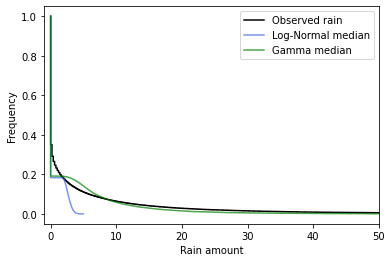

In [19]:
#probability of precipitation > x
from matplotlib import pyplot as plt 

import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF

#empirical cdf
allrain=np.array([])
for place in gamma_allcities:
    allrain=np.concatenate((allrain,place[5]))
ecdf=ECDF(allrain)
#alternative with median
log_med_ecdf=ECDF(log_median_all)
g_med_ecdf=ECDF(g_median_all)
#averaged cdfs gamma

plt.plot(ecdf.x, 1-ecdf.y,color='black')
plt.plot(log_med_ecdf.x,1-log_med_ecdf.y,color='royalblue',alpha=0.7)
plt.plot(g_med_ecdf.x,1-g_med_ecdf.y,color='green',alpha=0.7)
plt.xlim([-1,50])
plt.xlabel('Rain amount')
plt.ylabel('Frequency')
plt.legend(['Observed rain','Log-Normal median','Gamma median'])
plt.savefig('diagnost_figure_c')


#the blue line cuts off because there was no day where the median level was above ~5.

#for the blue line, we can vary how much certainty is require about non-zero rain to classify it as such. 
#ie: instead of: if(p>quantile):invcdf(...),else:0   we can do if(p*lambda>quantile):invcdf(...),else:0
# So in a sense, make it easier for the model to ferecast non zero rain by multiplying the hurdle by lambda>1.
# 
# Could even try and calibrate this, by varying the value of lambda to achieve a better fit 






### Observed vs Median 

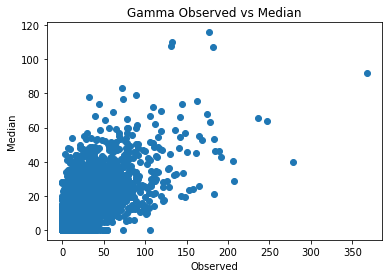

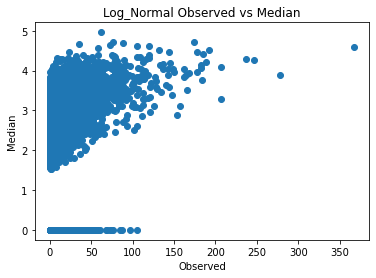

In [56]:
# Gamma
g_all_rain=[]
for place in gamma_allcities:
    g_all_rain.append(place[5])
g_all_rain=np.concatenate([i for i in g_all_rain])

plt.scatter(g_all_rain,g_median_all)
plt.title('Gamma Observed vs Median')
plt.xlabel('Observed')
plt.ylabel('Median')
plt.savefig('Gamma_obsvsmed')
plt.show()

# Log-Normal
log_all_rain=[]
for place in lognormal_allcities:
    log_all_rain.append(place[5])
log_all_rain=np.concatenate([i for i in log_all_rain])

plt.scatter(log_all_rain,log_median_all)
plt.title('Log_Normal Observed vs Median')
plt.xlabel('Observed')
plt.ylabel('Median')
plt.savefig('Log_obsvsmed')
plt.show()


### Spread-skill plot


Try #3 from Marios github. ie : quamtile75-quantile 25


In [231]:
#Gamma
g_error=[]
g_spread=[]
temp_spread=[]
temp_sample=[]
g_median_temp=0

for place in gamma_allcities:
    for day,rain in enumerate(place[5]):
        #median
        if place[4][day]>0.5:
            g_median_temp=scs.gamma(loc=1/place[3][day],scale=place[3][day]*place[2][day],a=1/place[3][day]).ppf((place[4][day]-0.5)/place[4][day])
        else:
            g_median_temp=0
        #error
        g_error.append(np.power(rain-g_median_temp,2))
        #spread
        temp_spread=[]
        for m in range(1000):
            temp_sample=scs.gamma.rvs(loc=1/place[3][day],scale=place[3][day]*place[2][day],a=1/place[3][day])
            temp_spread.append(np.power(temp_sample-g_median_temp,2))
        temp_spread=np.mean(temp_spread)
        g_spread.append(temp_spread)
    print(place[0])

#lognormal
l_error=[]
l_spread=[]
temp_spread=[]
temp_sample=[]
l_median_temp=0

for place in lognormal_allcities:
    for day,rain in enumerate(place[5]):
        #median
        if place[4][day]>0.5:
            l_median_temp=scs.lognorm(s=place[3][day],loc=place[2][day]).ppf((place[4][day]-0.5)/place[4][day])
        else:
            l_median_temp=0
        #error
        l_error.append(np.power(rain-l_median_temp,2))
        #spread
        temp_spread=[]
        for m in range(1000):
            temp_sample=scs.lognorm.rvs(s=place[3][day],loc=place[2][day])
            temp_spread.append(np.power(temp_sample-l_median_temp,2))
        temp_spread=np.mean(temp_spread)
        l_spread.append(temp_spread)
    print(place[0])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36


In [125]:
import numpy as np

#gamma

#sort spread and keep track of indexes
g_skillidx=np.argsort(np.array(g_spread))
g_sorted_spread=sorted(g_spread)

#binning spread
g_spread_final=[[]for i in range(30)]
for bracket in range(30):
    for index in range(2421):
        g_spread_final[bracket].append(g_sorted_spread[index*(bracket+1)])

#sorting error correctly
g_error_sorted=[]
for idx in g_skillidx:
    g_error_sorted.append(g_error[idx])

#binning sorted error
g_error_final=[[]for i in range(30)]
for bracket in range(30):
    for index in range(2421):
        g_error_final[bracket].append(g_error_sorted[index*(bracket+1)])

#finally mean each bin for spread and error

for i in range(30):
    g_error_final[i]=np.mean(g_error_final[i])
    g_spread_final[i]=np.mean(g_spread_final[i])

#lognormal


#sort spread and keep track of indexes
l_skillidx=np.argsort(np.array(l_spread))
l_sorted_spread=sorted(l_spread)

#binning spread
l_spread_final=[[]for i in range(30)]
for bracket in range(30):
    for index in range(2421):
        l_spread_final[bracket].append(l_sorted_spread[index*(bracket+1)])

#sorting error correctly
l_error_sorted=[]
for idx in l_skillidx:
    l_error_sorted.append(g_error[idx])

#binning sorted error
l_error_final=[[]for i in range(30)]
for bracket in range(30):
    for index in range(2421):
        l_error_final[bracket].append(l_error_sorted[index*(bracket+1)])

#finally mean each bin for spread and error

for i in range(30):
    l_error_final[i]=np.mean(l_error_final[i])
    l_spread_final[i]=np.mean(l_spread_final[i])



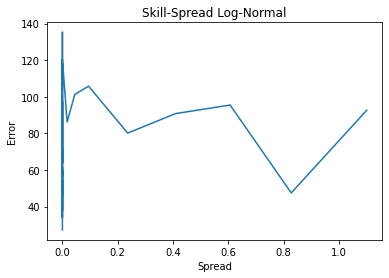

In [126]:
plt.plot(l_spread_final,l_error_final)
plt.xlabel('Spread')
plt.ylabel('Error')
plt.title('Skill-Spread Log-Normal')
plt.savefig('lognorm_skillspread')

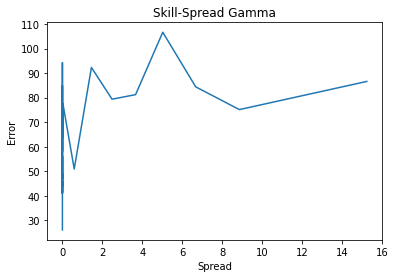

In [127]:
plt.plot(g_spread_final,g_error_final)
plt.xlabel('Spread')
plt.ylabel('Error')
plt.title('Skill-Spread Gamma')
plt.savefig('Gamma_skillspread')

In [57]:
# Trying q75-q25 for spread

# 25 and 75 percentiles
import math
# Gamma 
g_q25_all = []
g_q75_all = []

for place in gamma_allcities:
    for m,d,i in zip(place[2],place[3],range(len(place[4]))) :
        g_alpha = 1/d
        g_beta = g_alpha/m
        rv = scs.gamma(loc=g_alpha,scale=1/g_beta,a=g_alpha)  
        
        g_q25_all.append(rv.ppf((place[4][i]-1+0.25)/place[4][i]))
        g_q75_all.append(rv.ppf((place[4][i]-1+0.75)/place[4][i]))

for q in [g_q75_all,g_q25_all]:
    for i in range(len(q)):
        if math.isnan(q[i]):
            q[i]=0
print([len(g_q25_all),len(g_q75_all)])

log_q25_all = []
log_q75_all = []

for place in lognormal_allcities:
    for m,d,i in zip(place[2],place[3],range(len(place[4]))) :
        rv = scs.lognorm(s=place[3][i],loc=place[2][i])
        
        log_q25_all.append(rv.ppf((place[4][i]-1+0.25)/place[4][i]))
        log_q75_all.append(rv.ppf((place[4][i]-1+0.75)/place[4][i]))

for q in [log_q75_all,log_q25_all]:
    for i in range(len(q)):
        if math.isnan(q[i]):
            q[i]=0
print([len(log_q25_all),len(log_q75_all)])

[72630, 72630]
[72630, 72630]


In [64]:
# Error and Spread

#Gamma
g_error=[]
g_spread=[]

for place in gamma_allcities:
    for day,rain in enumerate(place[5]):
        #error
        g_error.append(np.power(rain-g_median_all[day],2))
        #spread
        g_spread.append(np.power(g_q25_all[day]-g_q75_all[day],2))
print([len(g_spread),len(g_error)])

#lognormal
l_error=[]
l_spread=[]


for place in lognormal_allcities:
    for day,rain in enumerate(place[5]):
        #error
        l_error.append(np.power(rain-log_median_all[day],2))
        #spread
        l_spread.append(np.power(log_q25_all[day]-log_q75_all[day],2))
print([len(l_spread),len(l_error)])


[72630, 72630]
[72630, 72630]


In [128]:
#gamma

#sort spread and keep track of indexes
g_skillidx=np.argsort(np.array(g_spread))

#binning spread
g_spread_final=scs.binned_statistic(sorted(g_spread),sorted(g_spread),statistic='mean',bins=30)[0]

#sorting error correctly
g_error_sorted=[]
for idx in g_skillidx:
    g_error_sorted.append(g_error[idx])

#binning sorted error
g_error_final=scs.binned_statistic(g_error_sorted,g_error_sorted,statistic='mean',bins=30)[0]



#lognormal

#sort spread and keep track of indexes
l_skillidx=np.argsort(np.array(l_spread))

#binning spread
l_spread_final=scs.binned_statistic(sorted(l_spread),sorted(l_spread),statistic='mean',bins=30)[0]

#sorting error correctly
l_error_sorted=[]
for idx in l_skillidx:
    l_error_sorted.append(l_error[idx])

#binning sorted error
l_error_final=scs.binned_statistic(l_error_sorted,l_error_sorted,statistic='mean',bins=30)[0]



In [122]:
for idx,val in enumerate(g_spread_final):
    if math.isnan(val):
        print(idx)




3
4
7
8
9
10
11
12
13
14


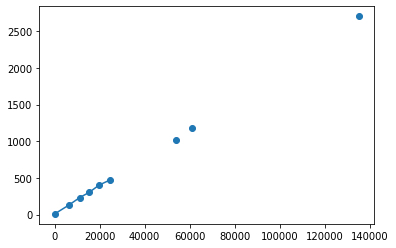

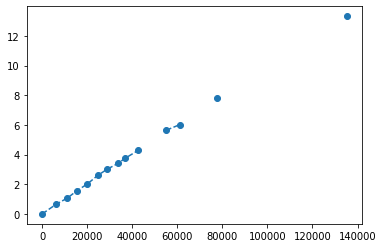

In [129]:
#Gamma Spread-Skill
plt.plot(g_error_final,g_spread_final,'-o')
plt.show()
plt.plot(l_error_final,l_spread_final,'--o')
plt.show()


In [145]:
qm_bins=[[] for i in range(30)]

for idx,b in enumerate(scs.binned_statistic(g_error_sorted,g_error_sorted,statistic='mean',bins=30)[1]):
    if idx<31:
        for val in g_error_sorted:
            if val>=b and val<scs.binned_statistic(g_error_sorted,g_error_sorted,statistic='mean',bins=30)[1][idx+1]:
                qm_bins[idx].append(val)



IndexError: index 31 is out of bounds for axis 0 with size 31

In [ ]:
for i in range(30):
    qm_bins[i]=np.mean(qm_bins[i])
    

In [140]:
scs.binned_statistic(g_error_sorted,g_error_sorted,statistic='mean',bins=30)

BinnedStatisticResult(statistic=array([5.04140761e+01, 6.20850839e+03, 1.11970194e+04, 1.53328946e+04,
       1.97931918e+04, 2.46515366e+04, 2.83069800e+04, 3.34345542e+04,
       3.68640000e+04, 4.26423400e+04,            nan, 5.38659453e+04,
                  nan, 6.11078400e+04,            nan,            nan,
                  nan, 7.75065600e+04,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan, 1.35129760e+05]), bin_edges=array([     0.        ,   4504.32533333,   9008.65066667,  13512.976     ,
        18017.30133333,  22521.62666667,  27025.952     ,  31530.27733333,
        36034.60266667,  40538.928     ,  45043.25333333,  49547.57866667,
        54051.904     ,  58556.22933333,  63060.55466667,  67564.88      ,
        72069.20533333,  76573.53066667,  81077.856     ,  85582.18133333,
        90086.50666667,  94590.832     ,  990